In [87]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from iminuit import Minuit
from scipy import stats
import matplotlib as mpl
sys.path.append('../External_Functions')
from ExternalFunctions import *
from scipy import special as spe
%matplotlib inline
#set mpl font
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

data_vp = np.loadtxt('data_VoltagePeaks.txt')

Kian Gao

shp593

Final exam on AppStat2020

# I – Distributions and probabilities:

**1.1.1**

The probability of $N_3$ follows binomial distribution. First, for each roll, the N3 distribution is binomial distribution N(20, 1/6). 

Another property is that according to central limit theorem, if number of dice is large enough, the final distribution of N3 will tend to be gaussian. 


**1.1.2**

The probability of getting 7 or more 3s in one roll with 20 dice is calculated by $1-\sum_{n=0}^{6}C_{20}^n (\frac{1}{6})^{n}(\frac{5}{6})^{20-n} \approx 0.0371$  

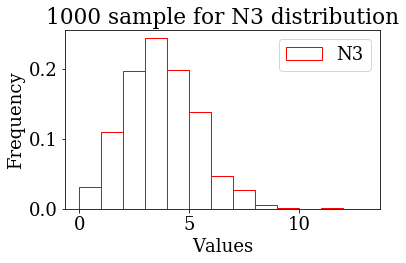

In [1367]:
n3 = np.zeros(1000)
for i in range(1000):
    roll = np.random.randint(1,7,20)
    n3[i] = np.count_nonzero(roll==3)
plt.hist(n3, 13, (0, 13), fill=False, edgecolor='r', label=('N3'), density=True)
plt.legend()
plt.title('1000 sample for N3 distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()

In [1130]:
p_match = 1/6
p_match_even=0
for i in range(7):
    p_match_even += spe.comb(20, i) * (p_match**i) * (1-p_match)**(20-i)
print('With random sampling:')
print('Getting 7 or more 3s in a roll is %2.5f'%(1-p_match_even))

With random sampling:
Getting 7 or more 3s in a roll is 0.03714


**1.2.1**

The positive fraction of PCR is $\frac{2464}{103261}\approx 0.0239$, and the positive rate of AntiGen is $\frac{491}{26162}\approx 0.0188$

Using confidence interval between portion. Variance of p1-p2 is calculated by $\frac{p1(1-p1)}{n1}+\frac{p2(1-p2)}{n2}$

In [1413]:
stats.fisher_exact([[2464, 491], [103261-2464, 26162-491]])
stats.chi2_contingency([[2464, 491], [103261-2464, 26162-491]])
stats.binom_test(491, 26162, 2464/103261)

p1 = 2464 / 103261
p2 = 491 / 26192
var_p = p1*(1-p1)/103261 + p2*(1-p2)/26192
print('p1-p2 is %2.10f'%(p1-p2))
print('The variance of p1-p2 is %2.10f'%var_p)
print('Give 75% confidence interval, p1-p2 +/- 1.15*SE(p1-p2), where SE = sqrt(variance)')
print('\nTherefore, 75% confidence interval of p1-p2 should be')
print('%2.7f < %2.7f < %2.7f'%(1.15*(p1-p2-np.sqrt(var_p)), p1-p2,1.15*(p1-p2+np.sqrt(var_p))))
print('So we have at least 75% confidence that they are statistically the same')

p1-p2 is 0.0051156826
The variance of p1-p2 is 0.0000009279
Give 75% confidence interval, p1-p2 +/- 1.15*SE(p1-p2) where SE = sqrt(variance)

Therefore, 75% confidence interval of p1-p2 should be
0.0047753 < 0.0051157 < 0.0069908
So we have at least 75% confidence that they are statistically the same


**1.2.2**

Assuming that PCR test is totally accurate. Then the sample AntiGen use supposes to have $2464 \times 26192 \div 103261 \approx 625$ people infected. Therefore, the false negative rate is $(625 - 491) \div 625 = 21.44\%$

**1.2.3**

First we have 0.02% false positive and 20% false negative, given:
$$47 = \text{P}(1-20\%)+(50000-\text{P})\times(0.02\%)$$
where P is the positive in reality. Result in $\text{P} = 37 \div 0.7998 \approx 46.2615654$. Therefore, the positive rate is $\text{P} / 50000$, approximately 
$0.0925\%$

**1.3.1**


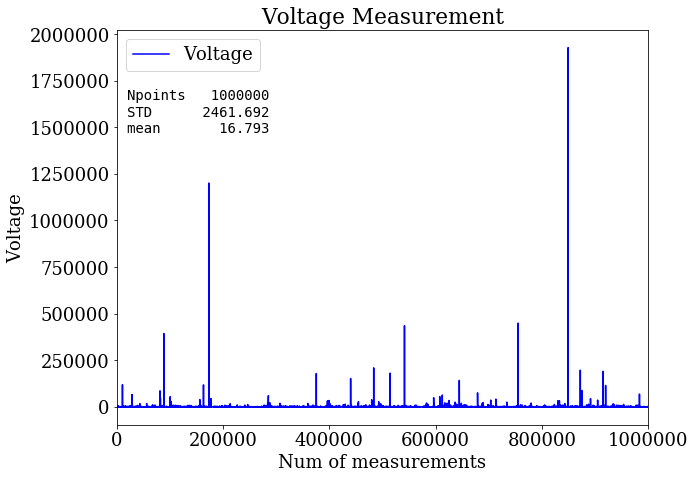

In [130]:
fig_v, ax_v = plt.subplots(figsize=(10,7))
ax_v.plot(np.linspace(0,len(data_vp),len(data_vp)), data_vp, label='Voltage', c='b')
ax_v.set_xlabel('Num of measurements')
ax_v.set_ylabel('Voltage')
plt.legend()
ax_v.set_title('Voltage Measurement')
ax_v.set_xlim(0, len(data_vp))
d = {'Npoints' : len(data_vp),
    'STD': np.std(data_vp),
     'mean':     np.average(data_vp),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text, ax_v, fontsize=14)
fig_v.tight_layout()

**1.3.2**

In order to fit the peak in the diagram, first we need to seach all the peaks out, and then zoom in to see what the peaks looks like.

The peaks is 
 [ 10835  28804  81495  88668 163305 173214 375641 440218 483657 514504
 541575 612736 644727 679105 755368 849590 872460 875504 915527 920077
 983782]


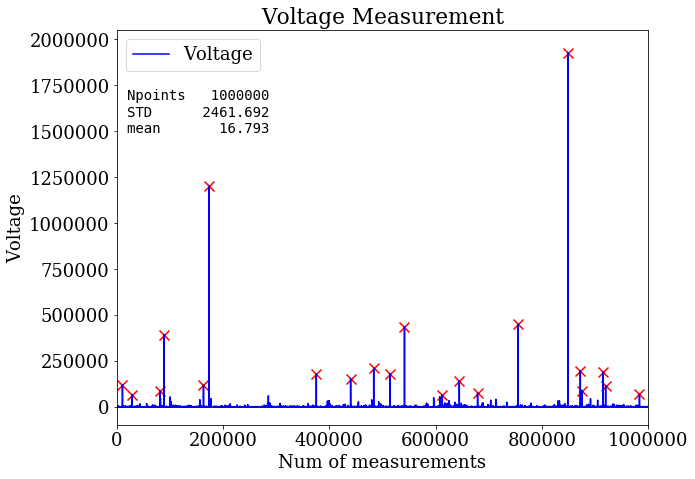

In [131]:
from scipy.signal import find_peaks
peak_vol = find_peaks(data_vp, distance=100, height=1000, prominence=60000)[0]
ax_v.scatter(np.linspace(0,len(data_vp),len(data_vp))[peak_vol], data_vp[peak_vol], marker='x', color='r', s=100)
print('The peaks is \n', peak_vol)
fig_v

Zoom in one peak to seek for the distribution. Notice that it follows a gaussian distribution

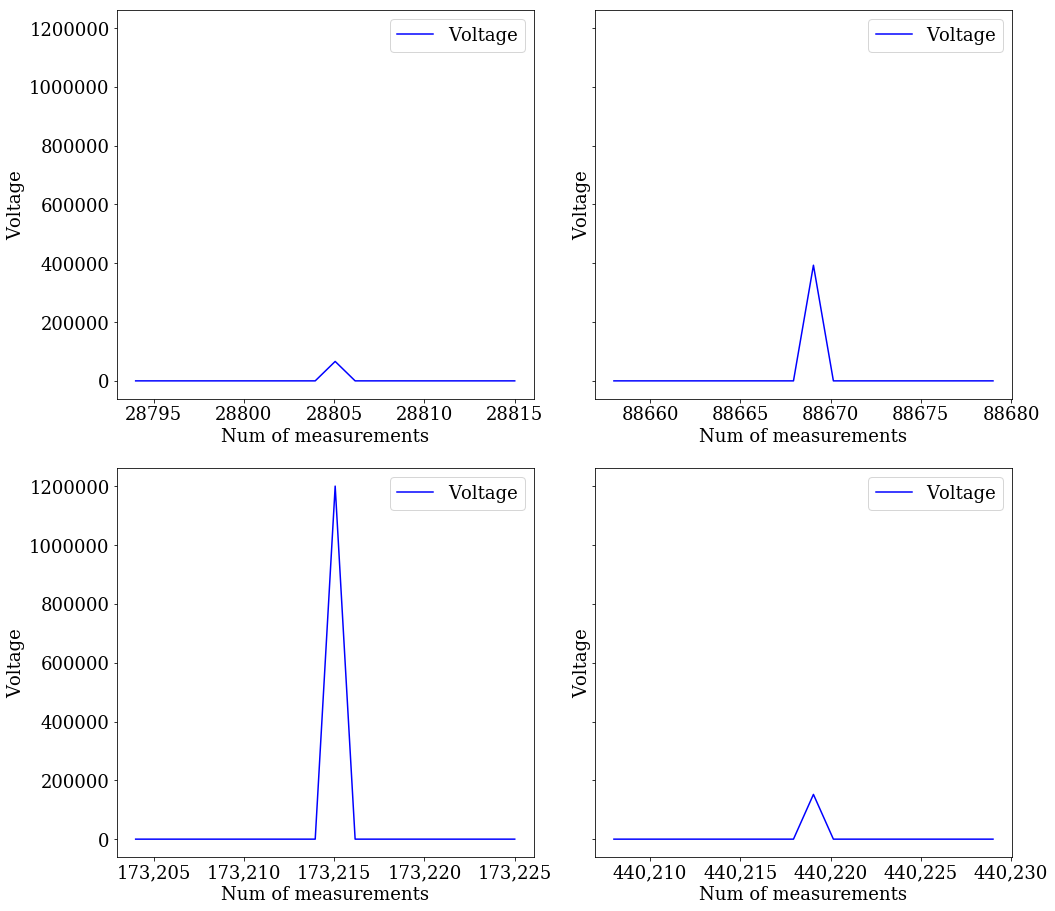

In [1246]:
fig_p1,([ax_p1, ax_p2],[ax_p3, ax_p4]) = plt.subplots(2,2,figsize=(15,13),sharey=True)
ax_p1.plot(np.linspace(peak_vol[1]-10,peak_vol[1]+11, 20), data_vp[peak_vol[1]-10:peak_vol[1]+10], label='Voltage', c='b')
ax_p2.plot(np.linspace(peak_vol[3]-10,peak_vol[3]+11, 20), data_vp[peak_vol[3]-10:peak_vol[3]+10], label='Voltage', c='b')
ax_p3.plot(np.linspace(peak_vol[5]-10,peak_vol[5]+11, 20), data_vp[peak_vol[5]-10:peak_vol[5]+10], label='Voltage', c='b')
ax_p4.plot(np.linspace(peak_vol[7]-10,peak_vol[7]+11, 20), data_vp[peak_vol[7]-10:peak_vol[7]+10], label='Voltage', c='b')
ax_p1.set_xlabel('Num of measurements')
ax_p1.set_ylabel('Voltage')
ax_p2.set_xlabel('Num of measurements')
ax_p2.set_ylabel('Voltage')
ax_p3.set_xlabel('Num of measurements')
ax_p3.set_ylabel('Voltage')
ax_p4.set_xlabel('Num of measurements')
ax_p4.set_ylabel('Voltage')
ax_p3.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax_p4.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax_p1.legend()
ax_p2.legend()
ax_p3.legend()
ax_p4.legend()
fig_p1.tight_layout()

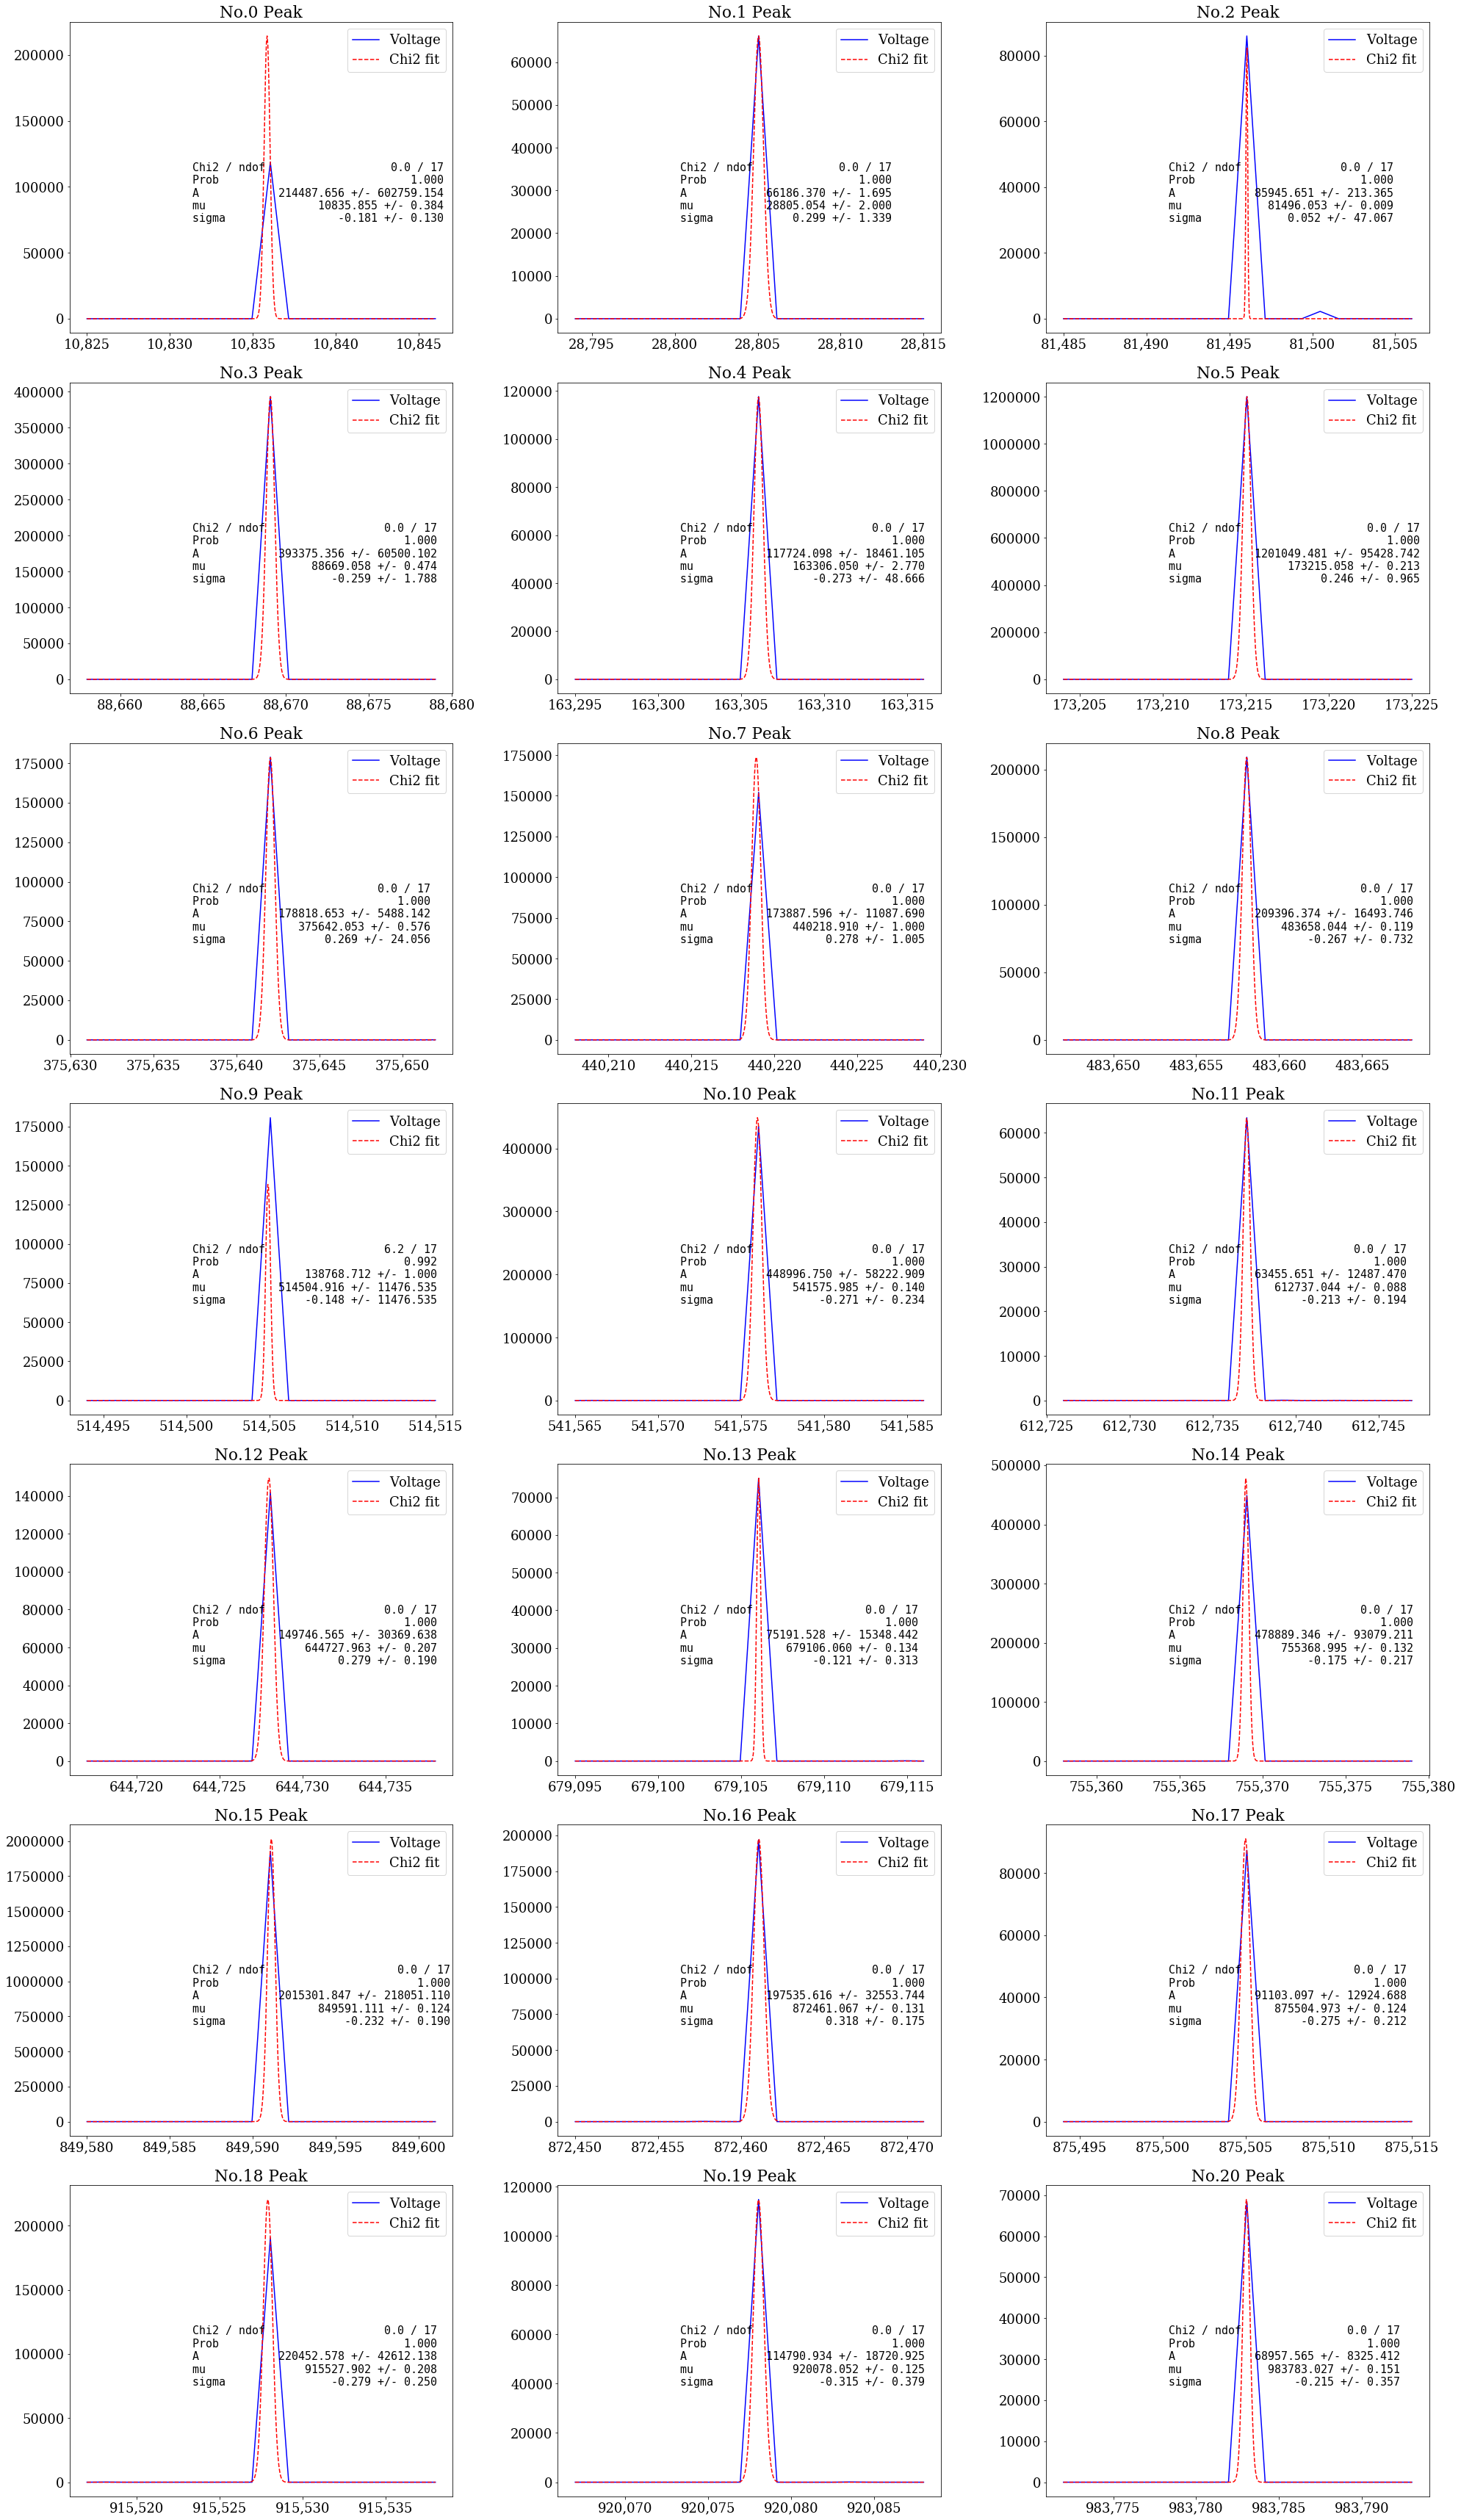

In [1297]:
def gaussian_fit(x,n,mu,sigma):
    return n*np.exp(-(x-mu)**2/(2*sigma**2))

figs_v, axes_v = plt.subplots(7, 3, figsize=(28, 48))
for i in range(21):
    ax = axes_v[i//3, i%3]
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.plot(np.linspace(peak_vol[i]-10,peak_vol[i]+11, 20), data_vp[peak_vol[i]-10:peak_vol[i]+10], label='Voltage', c='b')
    
    x = np.linspace(peak_vol[i]-10,peak_vol[i]+11, 20)
    chi2_u_object = Chi2Regression(gaussian_fit, x, data_vp[peak_vol[i]-10:peak_vol[i]+10], 0.1*data_vp[peak_vol[i]])
    u_minuit = Minuit(chi2_u_object, pedantic=False, n=0.1*data_vp[peak_vol[i]], mu=peak_vol[i], sigma=0.3)
    u_minuit.migrad()
    chi2_u_minuit = u_minuit.fval
    N_u_dof = len(x)-3

    d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_u_minuit, N_u_dof),
         'Prob':stats.chi2.sf(chi2_u_minuit, N_u_dof),
         'A': [u_minuit.values['n'],u_minuit.errors['n']],
         'mu':[u_minuit.values['mu'],u_minuit.errors['mu']],
         'sigma':[u_minuit.values['sigma'],u_minuit.errors['sigma']]
        }

    x_axis = np.linspace(peak_vol[i]-10,peak_vol[i]+11, 500)
    ax.plot(x_axis, gaussian_fit(x_axis, *u_minuit.args), '--', color='r', label='Chi2 fit') 
    ax.set_title('No.'+str(i)+' Peak')
    text = nice_string_output(d, extra_spacing=2, decimals=3)
    add_text_to_ax(0.32, 0.55, text, ax, fontsize=15)
    ax.legend()
    
    
figs_v.tight_layout()

The fit is given relative uncertainty 10% to obtain a better fitting. Nevertheless, some of the fitting is still problematic because the peak is so sharp that gaussian distribution is hard to catch up. Almost every peak lasts only for one frame.

# II – Error propagation:

**2.1.1**

$x = 1.96 \pm 0.03$, therefore $\sigma_x=0.03$, $\sigma_y^2 = (\frac{\partial{y}}{\partial{x}})^2 \sigma_x^2$, $\sigma_z^2 = (\frac{\partial{z}}{\partial{x}})^2 \sigma_x^2$. 

$$\frac{\partial{y}}{\partial{x}} = \frac{-2x}{(1+x^2)^2}$$
$$\frac{\partial{z}}{\partial{x}} = \frac{2}{(1-x)^3}$$

In [185]:
def dydx(x):
    return -2*x/((1+x**2)**2)
def dzdx(x):
    return 2/((1-x)**(3))
mu_y = (1+1.96**2)**(-1)
mu_z = (1-1.96)**(-2)
sig_y = np.sqrt(dydx(1.96)**2 * 0.03**2)
sig_z = np.sqrt(dzdx(1.96)**2 * 0.03**2)
print('The value of y is %2.3f, and the uncertainty(sigma y) is %2.4f'% (mu_y,sig_y))
print('The value of z is %2.3f, and the uncertainty(sigma z) is %2.4f'% (mu_z,sig_z))

The value of y is 0.207, and the uncertainty(sigma y) is 0.0050
The value of z is 1.085, and the uncertainty(sigma z) is 0.0678


**2.1.2**

In [184]:
mu_y = (1+0.96**2)**(-1)
mu_z = (1-0.96)**(-2)
sig_y = np.sqrt(dydx(0.96)**2 * 0.03**2)
sig_z = np.sqrt(dzdx(0.96)**2 * 0.03**2)
print('when x = 0.96 +/- 0.03')
print('The value of y is %2.3f, and the uncertainty(sigma y) is %2.4f'% (mu_y,sig_y))
print('The value of z is %2.3f, and the uncertainty(sigma z) is %2.4f'% (mu_z,sig_z))

when x = 0.96 +/- 0.03
The value of y is 0.520, and the uncertainty(sigma y) is 0.0156
The value of z is 625.000, and the uncertainty(sigma z) is 937.5000


**2.2.1**

Weighted mean is $\frac{\sum{x_i/\sigma^2}}{\sum 1/\sigma^2}$, and the related SD is $\sqrt{\frac{1}{\sum 1/\sigma^2}}$ 

In [232]:
g_result = np.array([9.54, 9.36, 10.02, 9.87, 9.98, 9.86, 9.86, 9.81, 9.79])
g_unc = np.array([0.15, 0.1, 0.11, 0.08, 0.14, 0.06, 0.03, 0.13, 0.04])
g_percentage = g_unc/g_result
print('Directly look at the percentage uncertainty')
for i in range(len(g_unc)):
    print('Group '+str(i+1)+": {0:.3%}".format(g_percentage[i]))
print('\nWhile looking at the percentage uncertainty,\nthe best group is group7 with g =', g_result[6], 'm/s^2, and sigma =', g_unc[6], 'm/s^2')
print('Meanwhile, they also own the best absolute uncertainty')

print('\nThe best estimation from me is weighted average')
g_weighted_avg = np.sum(g_result/g_unc**2) / np.sum(1/g_unc**2)
print('The calculation result of weighted mean of g is %2.3f m/s^2'%g_weighted_avg)
g_weighted_unc = np.sqrt(1/np.sum(1/(g_unc**2)))
print('And the mean of uncertainty %2.3f m/s^2'%g_weighted_unc)

Directly look at the percentage uncertainty
Group 1: 1.572%
Group 2: 1.068%
Group 3: 1.098%
Group 4: 0.811%
Group 5: 1.403%
Group 6: 0.609%
Group 7: 0.304%
Group 8: 1.325%
Group 9: 0.409%

While looking at the percentage uncertainty,
the best group is group7 with g = 9.86 m/s^2, and sigma = 0.03 m/s^2
Meanwhile, they also own the best absolute uncertainty

The best estimation from me is weighted average
The calculation result of weighted mean of g is 9.824 m/s^2
And the mean of uncertainty 0.020 m/s^2


**2.2.2**

$\chi^2 = 32.396$ and p-value = 0. From the graph, we can say that the measurement group 1 and 2, 3, 5 are outside of 3$\sigma_g$. Besides, although group 5 is also out of range, its uncertainty is large enough to touch the range of our estimation. Hence, group 1, 2, 3s' measurements are unlikely.

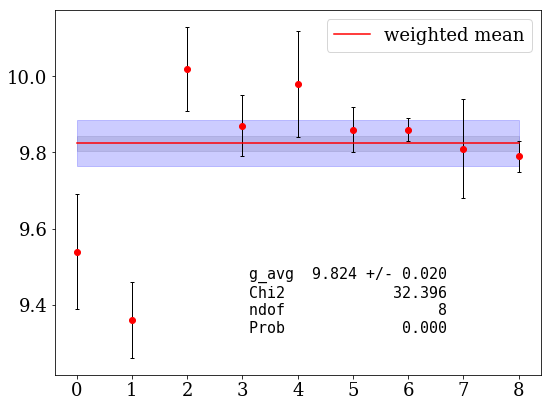

In [233]:
def constant_fit(x, a):
    return a

def chi2_mean_cal(y, ey, sy):
    chi2 = np.sum(((y - ey) / sy)**2)  
    return chi2

Ndof_h = len(g_result) - 1
Chi2_h = chi2_mean_cal(g_result, g_weighted_avg, g_unc)
Prob_chi2_h = stats.chi2.sf(Chi2_h, Ndof_h)  

fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(np.linspace(0,8,9), g_result, g_unc, fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1)
ax.plot(np.linspace(0,8,9), np.repeat(g_weighted_avg,9), '-r', label='weighted mean')
ax.fill_between(np.linspace(0,8,9), np.repeat(g_weighted_avg,9)-g_weighted_unc, np.repeat(g_weighted_avg,9)+g_weighted_unc,
                 color='gray', alpha=0.2)

ax.fill_between(np.linspace(0,8,9), np.repeat(g_weighted_avg,9)-3*g_weighted_unc, np.repeat(g_weighted_avg,9)+3*g_weighted_unc,
                 color='blue', alpha=0.2)

d = {'g_avg': "{:.3f} +/- {:.3f}".format(g_weighted_avg, np.sqrt(1/np.sum(1/g_unc**2))),
     'Chi2':     Chi2_h,
     'ndof':      Ndof_h,
     'Prob':     Prob_chi2_h,
    }
ax.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.4, 0.3, text, ax, fontsize=15)
fig.tight_layout()

**2.2.3**

Yes! The value $9.8158 \pm 0.001 m/s^2$ is less than one sigma away from my best estimate $9.824 \pm 0.020  m/s^2$ ! So they agree with each other.

# III – Monte Carlo

**3.1.1**

First, inspect the PDF. We found that the highest probability is 1.25. Then, we sample with accept and reject, with t = [0, 10] (Since ft(10) = 4.66 * 1e-6, small enough!), and a random number = [0, 1.25].

Text(0.5, 0, 't')

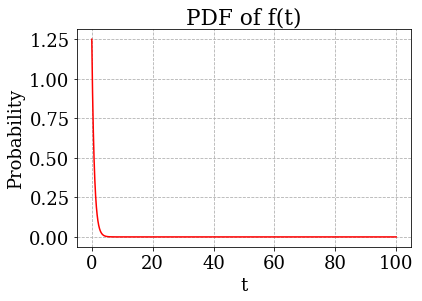

In [1555]:
def ft(x):
    return np.exp(-x/0.8)/0.8
plt.plot(np.linspace(0, 100, 10000), ft(np.linspace(0, 100, 10000)), c='r')
plt.grid(linestyle='--')
plt.title('PDF of f(t)')
plt.ylabel('Probability')
plt.xlabel('t')


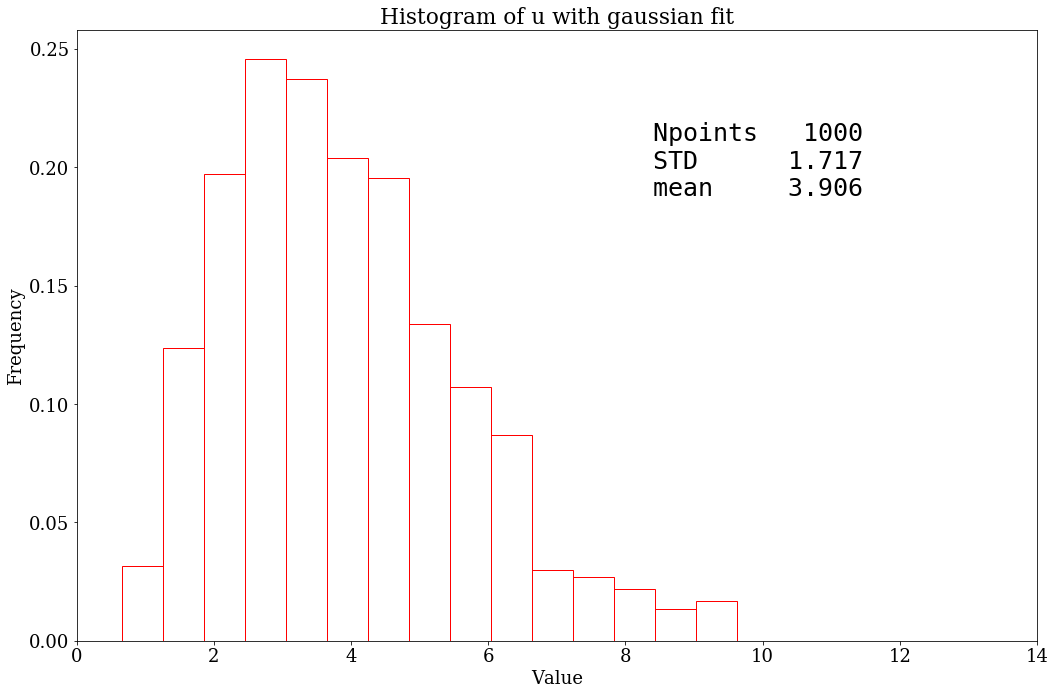

In [1559]:
fig_u, ax_u = plt.subplots(figsize=(15,10))
u = np.zeros(1000)
prob_sample=np.zeros(4000)
t_sample=np.zeros(4000)
for i in range(1000):
    count = 0
    while count <= 4:
        t = np.random.random()*1e1
        rand = np.random.random()*1.25
        prob_ft = ft(t)
        if rand < prob_ft:
            count += 1
            u[i]+=t
ax_u.set_title('Histogram of u with gaussian fit')
ax_u.set_xlabel('Value')
ax_u.set_ylabel('Frequency')
ax_u.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r', density=True)
ax_u.set_xlim(0, 14)
d = {'Npoints' : 1000,
    'STD': np.std(u),
     'mean':     np.average(u),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.6, 0.85, text, ax_u, fontsize=25)
fig_u.tight_layout()

u_fre, u_hist = np.histogram(u, 15)
# plt.show()

**3.1.2**

Assume that the bin count is Poisson distributed. The p-value is zero, which makes sense because the plot has a long tail.Therefore, the distribution is not normal distribution

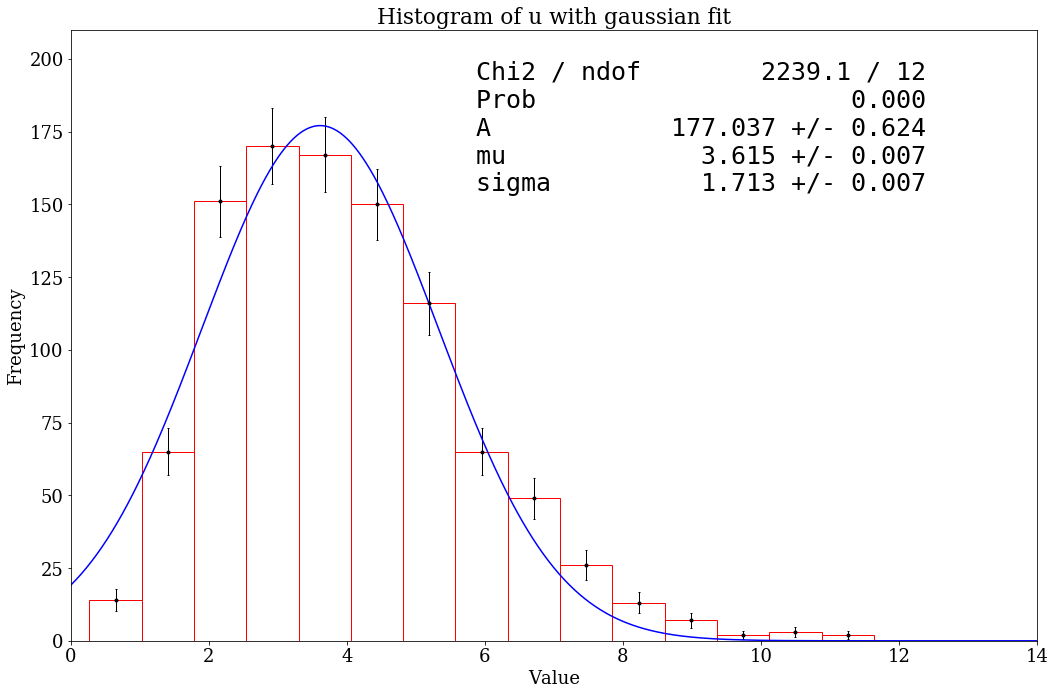

In [505]:
def gaussian_fit(x,n,mu,sigma):
    return n*np.exp(-(x-mu)**2/(2*sigma**2))

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_u_object = Chi2Regression(gaussian_fit, x, y)
u_minuit = Minuit(chi2_u_object, pedantic=False, n=100, mu=4, sigma=1)
u_minuit.migrad()
chi2_u_minuit = u_minuit.fval
N_u_dof = len(u_fre)-3
ax_u.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_u_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_u_minuit, N_u_dof),
     'A': [u_minuit.values['n'],u_minuit.errors['n']],
     'mu':[u_minuit.values['mu'],u_minuit.errors['mu']],
     'sigma':[u_minuit.values['sigma'],u_minuit.errors['sigma']]
    }

x_axis = np.linspace(0, 15, 1000)
ax_u.plot(x_axis, gaussian_fit(x_axis, *u_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_u, fontsize=25)
fig_u.tight_layout()
fig_u

**3.1.3**

I will try to fit with some distributions here.

c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


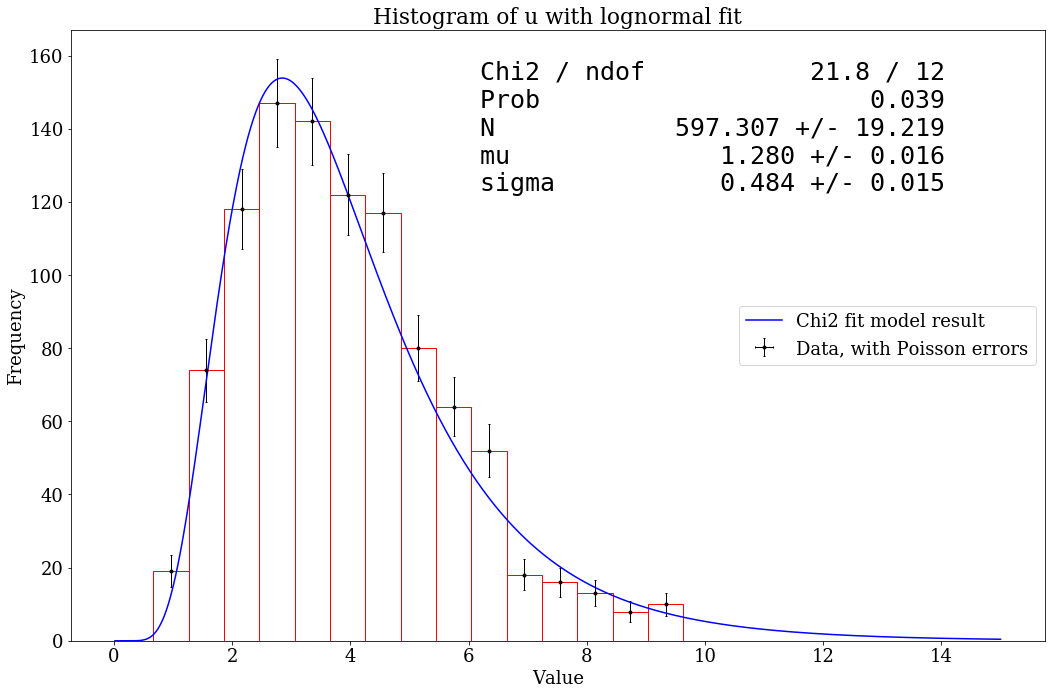

In [1561]:
def poisson(x, N, mu, loc):
    return N * stats.poisson.pmf(x, mu, loc)

def log_normal(x, N, mu, sigma):
    return N * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))

fig_lognor, ax_lognor = plt.subplots(figsize=(15,10))
ax_lognor.set_title('Histogram of u with lognormal fit')
ax_lognor.set_xlabel('Value')
ax_lognor.set_ylabel('Frequency')
ax_lognor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')
# ax_lognor.set_xlim(0, 14)
# ax_lognor.set_ylim(0, 170)

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_lognor_object = Chi2Regression(log_normal, x, y, sy)
poi_minuit = Minuit(chi2_lognor_object, pedantic=False, N=100, mu=4, sigma=1)
poi_minuit.migrad()
chi2_lognor_minuit = poi_minuit.fval
N_u_dof = len(u_fre)-3
ax_lognor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_lognor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_lognor_minuit, N_u_dof),
     'N': [poi_minuit.values['N'],poi_minuit.errors['N']],
     'mu':[poi_minuit.values['mu'],poi_minuit.errors['mu']],
     'sigma':[poi_minuit.values['sigma'],poi_minuit.errors['sigma']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_lognor.plot(x_axis,log_normal(x_axis, *poi_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_lognor, fontsize=25)
ax_lognor.legend(loc='right', fontsize=18)
fig_lognor.tight_layout()

Seems it works well, try the skewed normal distribution

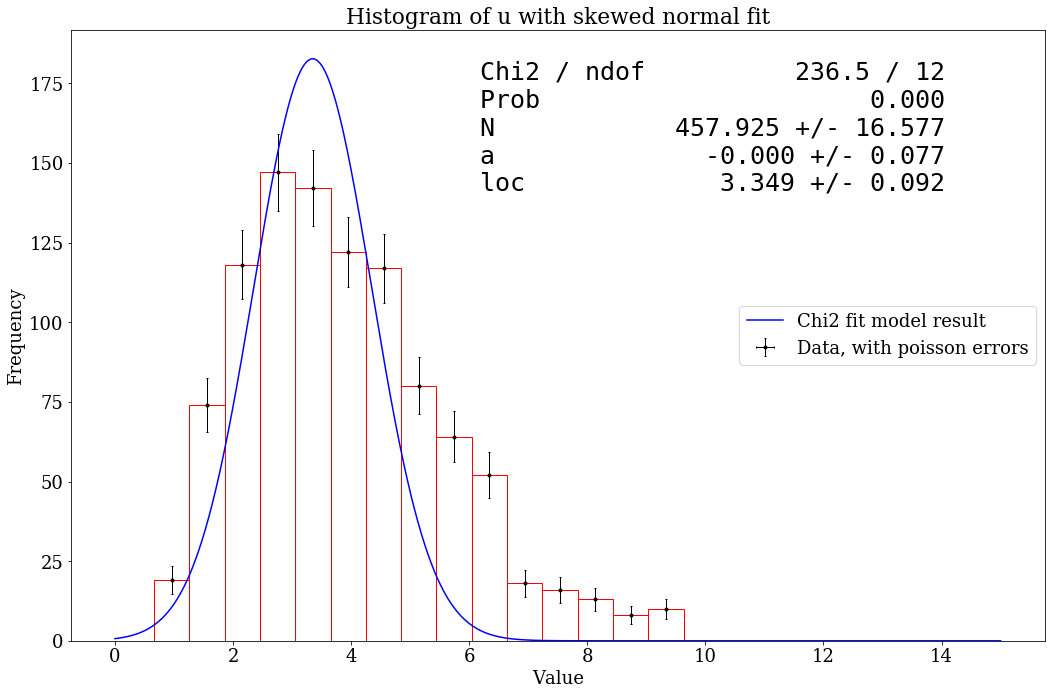

In [1566]:
def skewed_normal(x, N, a, loc):
    return N*stats.skewnorm.pdf(x, a, loc)

fig_skewnor, ax_skewnor = plt.subplots(figsize=(15,10))
ax_skewnor.set_title('Histogram of u with skewed normal fit')
ax_skewnor.set_xlabel('Value')
ax_skewnor.set_ylabel('Frequency')
ax_skewnor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_skewnor_object = Chi2Regression(skewed_normal, x, y, sy)
skew_minuit = Minuit(chi2_skewnor_object, pedantic=False, N=100, a=-5, loc=0)
skew_minuit.migrad()
chi2_skewnor_minuit = skew_minuit.fval
N_u_dof = len(u_fre)-3
ax_skewnor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_skewnor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_skewnor_minuit, N_u_dof),
     'N': [skew_minuit.values['N'],skew_minuit.errors['N']],
     'a':[skew_minuit.values['a'],skew_minuit.errors['a']],
     'loc':[skew_minuit.values['loc'],skew_minuit.errors['loc']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_skewnor.plot(x_axis,skewed_normal(x_axis, *skew_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_skewnor, fontsize=25)
ax_skewnor.legend(loc='right', fontsize=18)
fig_skewnor.tight_layout()

Not good, try double normal distribution.

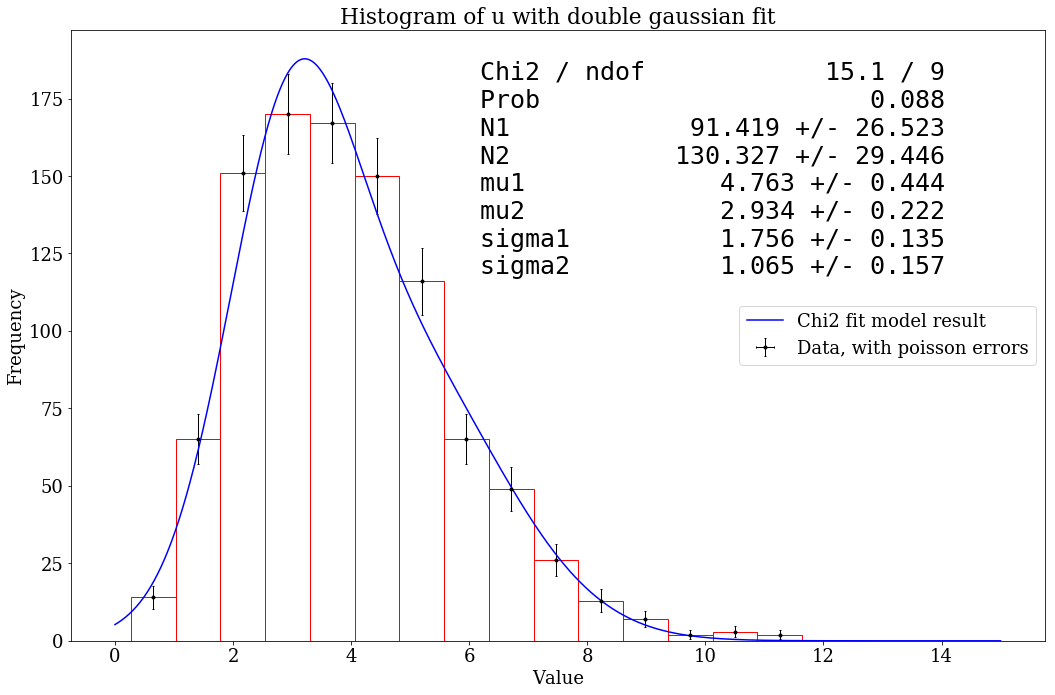

In [554]:
def dual_normal(x, N1, N2, mu1, mu2, sigma1, sigma2):
    return (N1*np.exp(-(x-mu1)**2/(2*sigma1**2))) + (N2*np.exp(-(x-mu2)**2/(2*sigma2**2)))

fig_dualnor, ax_dualnor = plt.subplots(figsize=(15,10))
ax_dualnor.set_title('Histogram of u with double gaussian fit')
ax_dualnor.set_xlabel('Value')
ax_dualnor.set_ylabel('Frequency')
ax_dualnor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_dualnor_object = Chi2Regression(dual_normal, x, y, sy)
dual_minuit = Minuit(chi2_dualnor_object, pedantic=False, N1=100, N2=10, mu1=3, mu2=6, sigma1=3, sigma2=1)
dual_minuit.migrad()
chi2_dualnor_minuit = dual_minuit.fval
N_u_dof = len(u_fre)-6
ax_dualnor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_dualnor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_dualnor_minuit, N_u_dof),
     'N1': [dual_minuit.values['N1'],dual_minuit.errors['N1']],
     'N2': [dual_minuit.values['N2'],dual_minuit.errors['N2']],
     'mu1':[dual_minuit.values['mu1'],dual_minuit.errors['mu1']],
      'mu2':[dual_minuit.values['mu2'],dual_minuit.errors['mu2']],
     'sigma1':[dual_minuit.values['sigma1'],dual_minuit.errors['sigma1']],
     'sigma2':[dual_minuit.values['sigma2'],dual_minuit.errors['sigma2']]
    }

x_axis = np.linspace(0, 15, 1000)
ax_dualnor.plot(x_axis,dual_normal(x_axis, *dual_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_dualnor, fontsize=25)
ax_dualnor.legend(loc='right', fontsize=18)
fig_dualnor.tight_layout()

The double gaussian fit gives a p-value of 0.09, which is rather good!

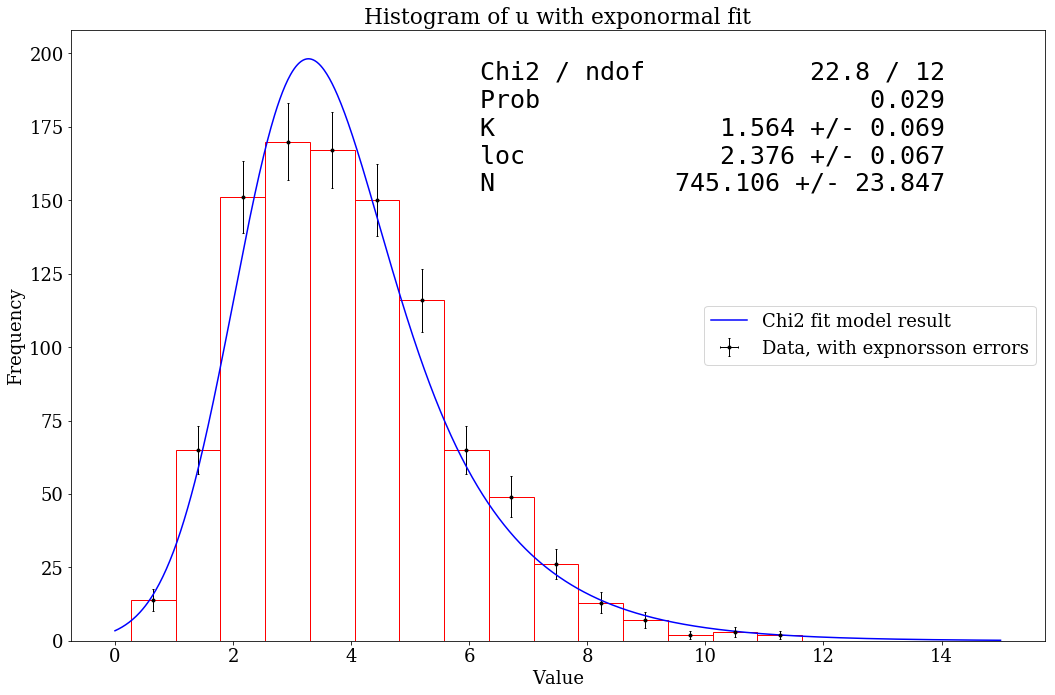

In [552]:
def expo_norm(x, K, loc, N):
    return N*stats.exponnorm.pdf(x, K, loc)

fig_exponor, ax_exponor = plt.subplots(figsize=(15,10))
ax_exponor.set_title('Histogram of u with exponormal fit')
ax_exponor.set_xlabel('Value')
ax_exponor.set_ylabel('Frequency')
ax_exponor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')
# ax_exponor.set_xlim(0, 14)
# ax_exponor.set_ylim(0, 170)

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_exponor_object = Chi2Regression(expo_norm, x, y, sy)
expnor_minuit = Minuit(chi2_exponor_object, pedantic=False, K=1, loc=3, N=700)
expnor_minuit.migrad()
chi2_exponor_minuit = expnor_minuit.fval
N_u_dof = len(u_fre)-3
ax_exponor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with expnorsson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_exponor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_exponor_minuit, N_u_dof),
     'K': [expnor_minuit.values['K'],expnor_minuit.errors['K']],
     'loc':[expnor_minuit.values['loc'],expnor_minuit.errors['loc']],
     'N':[expnor_minuit.values['N'],expnor_minuit.errors['N']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_exponor.plot(x_axis,expo_norm(x_axis, *expnor_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_exponor, fontsize=25)
ax_exponor.legend(loc='right', fontsize=18)
fig_exponor.tight_layout()

After $\chi^2$ fit of the exponential normal distribution, the p-value is 0.03, which also make sense. Therefore, double gaussian fit and exponormal fit might be options.

**3.2.1**

The F(x) of PDF is $-Ce^{-x}(x+1)$. Since $-e^{-x}(x+1)|^{\infty}_{0}$ is already nomalized, C can be 1.Take a look at the PDF distribution, the largest value of f(x) is no higher than 0.4.

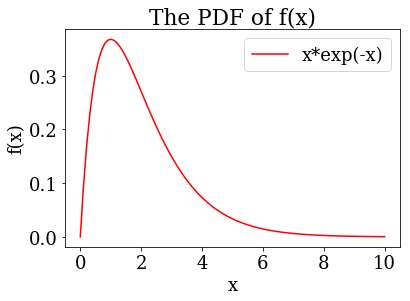

The value of x=20 is 0.00000459 


In [564]:
def pdf32(x):
    return x * np.exp(-x)

x = np.linspace(0, 10, 100)
y = pdf32(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('The PDF of f(x)')
plt.plot(x, y, label=('x*exp(-x)'), c='r')
plt.legend()
plt.show()
print('The value of x=20 is %2.8f '%pdf32(15))

Therefore, the upper boundary can be set to 20. Next, generate random numbers with accept and reject method. Plot one of the experiment with histogram.

In [585]:
for Nexp in range(10):
    m = np.zeros(1000)-1
    for i in range(1000):
        while m[i]==-1:
            x_sample = np.random.random()*20
            y_sample = np.random.random()*0.4
            if pdf32(x_sample)>y_sample:
                m[i] = x_sample
    print('No', Nexp, '\'s experiment x median value is %2.5f'%np.median(m))

No 0 's experiment x median value is 1.66781
No 1 's experiment x median value is 1.62487
No 2 's experiment x median value is 1.72595
No 3 's experiment x median value is 1.66640
No 4 's experiment x median value is 1.57138
No 5 's experiment x median value is 1.65675
No 6 's experiment x median value is 1.63958
No 7 's experiment x median value is 1.71817
No 8 's experiment x median value is 1.60462
No 9 's experiment x median value is 1.66333


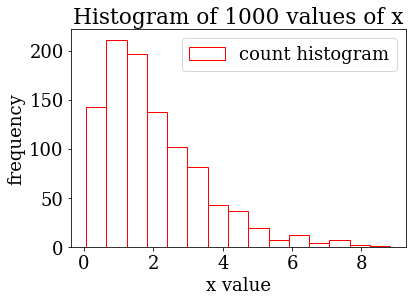

In [584]:
plt.title('Histogram of 1000 values of x')
plt.hist(m,15, histtype='bar', fill=False, edgecolor='r', label='count histogram')
plt.xlabel('x value')
plt.ylabel('frequency')
plt.legend()
plt.show()

From sampling, the median of x is around 1.6. Anallytically, when $\text{CDF} = 0.5, x \approx 1.67835$. 

# IV – Statistical tests

**4.1.1**

Use fisher exact test to seek the significant level of the vaccine experiment.

In [1418]:
oddsratio, pvalue = stats.fisher_exact(np.array([[8,21712],[162, 21566]]))
print('The p-value of Fisher exact test is', str(pvalue)[:5]+str(pvalue)[-5:])
print('Which is much lower than 5%')
chi2, pchi2, ndof, _= stats.chi2_contingency(np.array([[8,21712],[162, 21566]]))
print('\nSince the number is large, chi2 test in contingency is also a choice')
print('The p-value of Chi2 test is', str(pchi2)[:5]+str(pchi2)[-5:])
print('Which is also much lower than 5%')
print('Therefore, probability that the vaccine has worse effect is less than 1e-30')

print('\nOn the other hand, a binomial test can also offer a result')
print('Given the affect rate %2.4f, assume the distribution is binomial, then do the \
      binomial distribution test to see if we need to accept that BNT162b2 has no effect'%(162/21728))
print('P-value is', stats.binom_test(8, 21720, 162/21728, alternative='less'))
print('Therefore, the probability of vaccine has no effect is low')

p1 = 162 / 21728
p2 = 8 / 21720
var_p = p1*(1-p1)/21728 + p2*(1-p2)/21720
print('\nAt last, we do a null hypothesis test')
print('\n68% confidence interval of p1-p2 should be')
print('%2.7f < %2.7f < %2.7f'%((p1-p2-np.sqrt(var_p)), p1-p2,(p1-p2+np.sqrt(var_p))))
print('So we have at least 68% confidence that the vaccine is useful')
print('But less than 75% confidence (75% overflows)')

The p-value of Fisher exact test is 1.5664e-38
Which is much lower than 5%

Since the number is large, chi2 test in contingency is also a choice
The p-value of Chi2 test is 6.6419e-32
Which is also much lower than 5%
Therefore, probability that the vaccine has worse effect is less than 1e-30

On the other hand, a binomial test can also offer a result
Given the affect rate 0.0075, assume the distribution is binomial, then do the       binomial distribution test to see if we need to accept that BNT162b2 has no effect
P-value is 3.3355309441616695e-58
Therefore, the probability of vaccine has no effect is low

At last, we do a null hypothesis test

68% confidence interval of p1-p2 should be
0.0064895 < 0.0070875 < 0.0076854
So we have at least 68% confidence that the vaccine is useful
But less than 75% confidence (75% overflows)


**4.1.2**

Use risk ratio $\text{RR} = p_{vaccine} / p_{placebo}$, then the 68% confidence interval of the efficacy is:$$(1-\text{RR}\exp(1\cdot\sqrt{1/N_v+1/N_p}), 1-\text{RR}\exp(-1\cdot\sqrt{1/N_v+1/N_p}))$$

In [1567]:
rr = p2 / p1
rr_d, rr_u = 1-rr*np.exp(np.sqrt(1/162+1/8)),1-rr*np.exp(-np.sqrt(1/162+1/8))
print('Therefore, the interval is (%2.5f, %2.5f)'%(rr_d, rr_u))
print('We see the BNY162b2 efficacy is in 68 confident interval:\n%2.5f < %2.5f < %2.5f'%(rr_d,(162-8)/162,rr_u))

Therefore, the interval is (0.92904, 0.96561)
We see the BNY162b2 efficacy is in 68 confident interval:
 0.92904 < 0.95062 < 0.96561


**4.1.3**

Assume that vaccine is useless, do a binomial test for the severe cases. Assuming the p=0.5, and do two sides test.

In [1417]:
p = stats.binom_test(1, 10)
print('That the probability that BNT162b2 had no effect is %2.5f'%p)

That the probability that BNT162b2 had no effect is 0.02148


**4.2.1**

In [1128]:
data = np.genfromtxt("./data_ShuffledCards.txt", skip_header=2)
number = data[:,0]
value = data[:,4]
suit = data[:,5]

The distribution of the number of aces follows binomial distribution B(4, 1/13). Number of 0 has probability $C^0_4 (\frac{12}{13})^4$, 1 has $C^1_4 (\frac{12}{13})^3 (\frac{1}{13})^1$ and so on.

Check if the card is intact
4 4 4 4 4 4 4 4 4 4 4 4 4 

Chance of getting 3 aces or more is 0.0017156


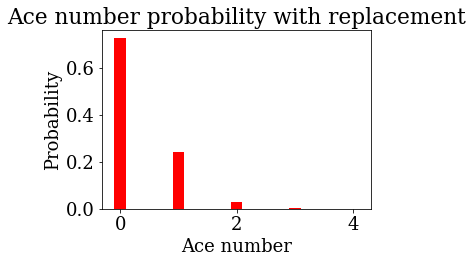

In [1518]:
print('Check if the card is intact')
for i in range(2, 15):
    print(len(np.argwhere(value==i)), end=' ')
print('')
temp = 0
for i in range(5):
    temp += stats.binom.pmf(i, 4, 1/13)
    plt.bar(i, stats.binom.pmf(i, 4, 1/13), color='r', width=0.2)
plt.xlabel('Ace number')
plt.ylabel('Probability')
plt.title('Ace number probability with replacement')
plt.tight_layout()
print('\nChance of getting 3 aces or more is %2.7f'%(stats.binom.pmf(3, 4, 1/13)+stats.binom.pmf(4, 4, 1/13)))

**4.2.2**

Without replacement, probability of drawing more than 3 aces is $C^1_4 (\frac{4}{52})(\frac{3}{51})(\frac{2}{50})(\frac{48}{49}) + (\frac{4}{52})(\frac{3}{51})(\frac{2}{50})(\frac{1}{49}) = 0.000713$

**4.2.3**

Test the number of odd after even and so on
The number of odd_even, odd_odd, even_even, even_odd is
15 9 13 14

Correlation coefficient with suit is
 [[ 1.         -0.09053914]
 [-0.09053914  1.        ]]

Correlation coefficient with value is
 [[ 1.         -0.17567809]
 [-0.17567809  1.        ]]


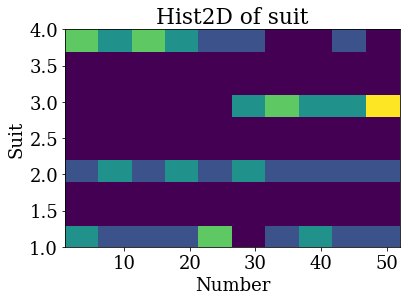

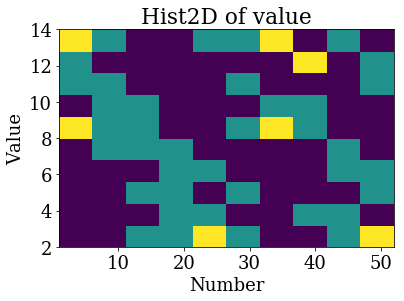

Looks like the randomness of the cards is ok, although there might be weak relation between value and the sequence of cards. So I can say it is not really well shuffled, but ok shuffled.


In [1549]:
print('Test the number of odd after even and so on')
count_odd_even=0
count_odd_odd=0
count_even_even=0
count_even_odd=0
for i in range(51):
    if value[i] % 2 ==0:
        if value[i+1] % 2 ==0:
            count_even_even+=1
        else:
            count_even_odd +=1
    elif value[i+1] % 2 == 0:
        count_odd_even+=1
    else:
        count_odd_odd+=1
print('The number of odd_even, odd_odd, even_even, even_odd is')
print(count_odd_even, count_odd_odd, count_even_even, count_even_odd)
print('\nCorrelation coefficient with suit is\n', np.corrcoef(number, suit))
print('\nCorrelation coefficient with value is\n', np.corrcoef(number, value))
plt.figure()
plt.hist2d(number, suit)
plt.xlabel('Number')
plt.ylabel('Suit')
plt.title('Hist2D of suit')
plt.figure()
plt.hist2d(number, value)
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('Hist2D of value')
plt.show()
print('Looks like the randomness of the cards is ok, although there might be weak relation between value and the sequence of cards. So I can say it is not really well shuffled, but ok shuffled.')

# V – Fitting data:
**5.1.1**

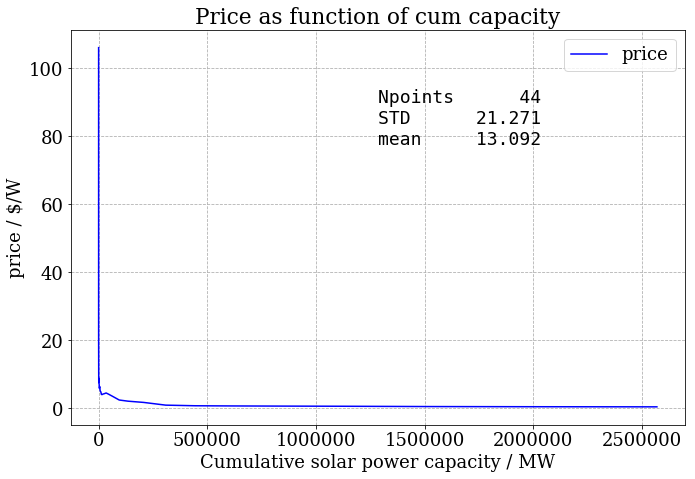

In [704]:
year, capacity, price = np.loadtxt("data_SolarPower.txt", skiprows=2, delimiter="\t", unpack=True)
fig_price, (ax_price) = plt.subplots(figsize=(10,7))
cum_capa = np.cumsum(capacity)
ax_price.plot(cum_capa, price, label='price', c='b')
ax_price.set_xlabel('Cumulative solar power capacity / MW')
ax_price.set_ylabel('price / $/W')
ax_price.grid(linestyle='--')
plt.legend()
ax_price.set_title('Price as function of cum capacity')
d = {'Npoints' : len(year),
    'STD': np.std(price),
     'mean':     np.average(price),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.5, 0.85, text, ax_price, fontsize=18)
fig_price.tight_layout()

**5.1.2**

c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


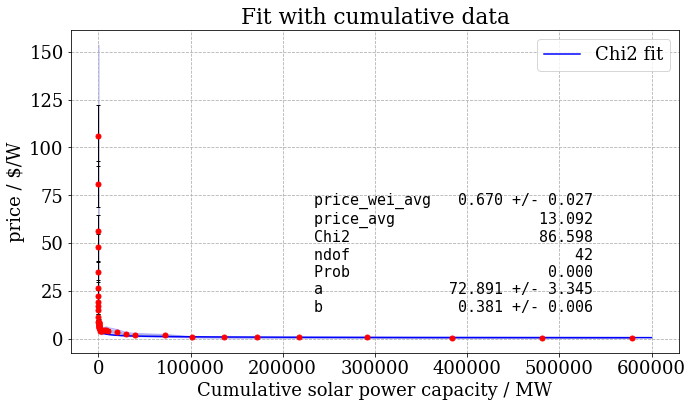

In [1057]:
def pow_fit(x, a, b):
    return a * np.power(x, -b)

def weighted_avg(x, sx):
    return (np.sum(x/sx**2)/np.sum(1/sx**2))
s_price = 0.15*(price)

capacity_scale = capacity
cum_capa_scale = cum_capa
s_price = 0.15*(price)

chi2_price_object = Chi2Regression(pow_fit, capacity, price, s_price)
price_minuit = Minuit(chi2_price_object, pedantic=False, a=1, b=1)
price_minuit.migrad()
chi2_price_minuit = price_minuit.fval
N_price_dof = len(price)-2
Prob_chi2_price = stats.chi2.sf(chi2_price_minuit, N_price_dof)  

fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(capacity , price, s_price, fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1, markersize=5)
x_price = np.linspace(0, 6e5, 1000)
ax.plot(x_price, pow_fit(x_price,*price_minuit.args), '-b', label='Chi2 fit')
ax.fill_between(capacity , price-s_price, price+s_price,
                 color='gray', alpha=0.2)

ax.fill_between(capacity , price-3*s_price, price+3*s_price,
                 color='blue', alpha=0.2)

d = {'price_wei_avg': "{:.3f} +/- {:.3f}".format(weighted_avg(price, s_price), np.sqrt(1/np.sum(1/s_price**2))),
     'price_avg' : '{:.3f}'.format(np.mean(price)),
     'Chi2':     chi2_price_minuit,
     'ndof':      N_price_dof,
     'Prob':     Prob_chi2_price,
     'a':[price_minuit.values['a'],price_minuit.errors['a']],
     'b':[price_minuit.values['b'],price_minuit.errors['b']],
    }
ax.legend()
price_arg=price_minuit.args
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax.set_xlabel('Cumulative solar power capacity / MW')
ax.set_ylabel('price / $/W')
ax.set_title('Fit with cumulative data')
ax.grid(linestyle='--')
add_text_to_ax(0.4, 0.5, text, ax, fontsize=15)
fig.tight_layout()

The best $\chi^2$ fit still can't get a decent p value. so the power law fit might not be a good fit.

Inspect price as function of year.

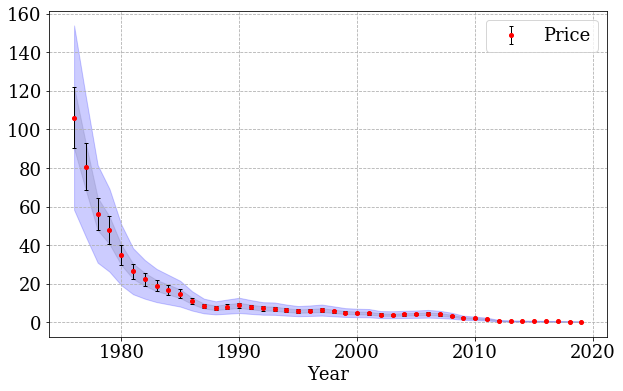

In [1058]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(year, price, s_price,marker='o',fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1, markersize=4, label='Price')
ax.legend()
ax.fill_between(year, price-s_price, price+s_price,
                 color='gray', alpha=0.2)

ax.fill_between(year, price-3*s_price, price+3*s_price,
                 color='blue', alpha=0.2)
ax.set_xlabel('Year')
ax.grid(linestyle='--')

**5.1.3**

First, plot cumlative solar power capacity with respect to year.

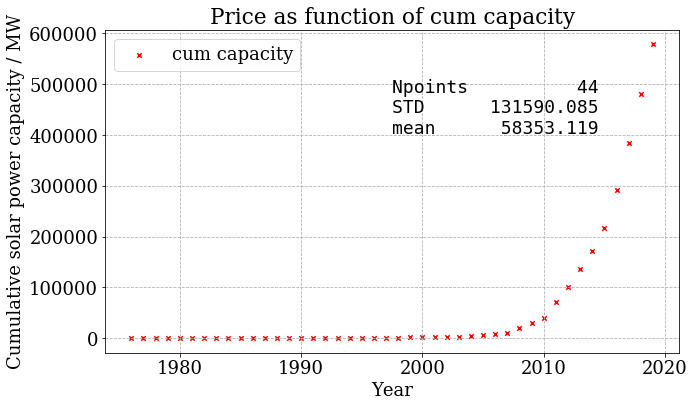

In [1056]:
fig_yc, ax_yc = plt.subplots(figsize=(10,6))
ax_yc.scatter(year, capacity, color='r',s=20, marker='x', label='cum capacity')
ax_yc.set_ylabel('Cumulative solar power capacity / MW')
ax_yc.set_xlabel('Year')
ax_yc.grid(linestyle='--')
plt.legend()
ax_yc.set_title('Price as function of cum capacity')
d = {'Npoints' : len(year),
    'STD': np.std(capacity),
     'mean':     np.average(capacity),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.5, 0.85, text, ax_yc, fontsize=18)
fig_yc.tight_layout()

Fit with $a\exp(c\cdot (x-b))$, with absolute uncertainty 3000.

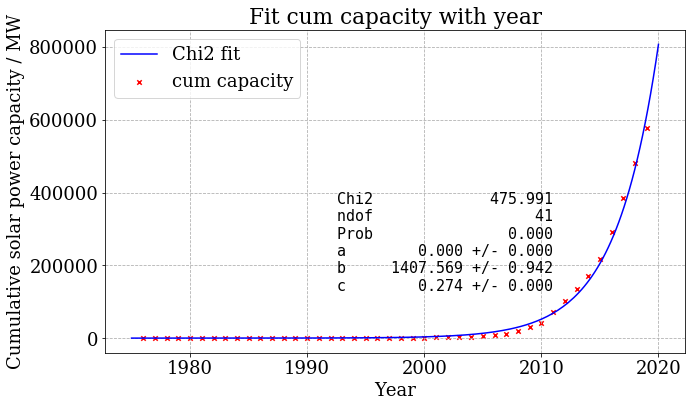

In [1040]:
def exp_fit(x, a, b, c):
    return a*np.exp(c*(x-b))

def poly3_fit(x, a, b, c, d, e):
    return a*(x-e)**3+b*(x-e)**2+c*(x-e)+d

def loc_pow_fit(x, N, a, b, c):
    return N * (x-a) ** b + c

chi2_capa_object = Chi2Regression(exp_fit, year, capacity, np.ones(len(year))*3000)
capa_minuit = Minuit(chi2_capa_object, pedantic=False, a=1e-67, b=1600,c=0.4)
capa_minuit.migrad()
chi2_capa_minuit = capa_minuit.fval
N_capa_dof = len(year)-3
Prob_chi2_capa = stats.chi2.sf(chi2_capa_minuit, N_capa_dof)  

fig_yc, ax_yc = plt.subplots(figsize=(10,6))
ax_yc.scatter(year, capacity, color='r',s=20, marker='x', label='cum capacity')
ax_yc.set_ylabel('Cumulative solar power capacity / MW')
ax_yc.set_xlabel('Year')
ax_yc.grid(linestyle='--')
x_capa = np.linspace(1975, 2020, 200)
ax_yc.plot(x_capa, exp_fit(x_capa,*capa_minuit.args), '-b', label='Chi2 fit')
d = {'Chi2':     chi2_capa_minuit,
     'ndof':      N_capa_dof,
     'Prob':     Prob_chi2_capa,
     'a':[capa_minuit.values['a'],capa_minuit.errors['a']],
     'b':[capa_minuit.values['b'],capa_minuit.errors['b']],
     'c':[capa_minuit.values['c'],capa_minuit.errors['c']],
    }
ax_yc.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax_yc.set_title('Fit cum capacity with year')
add_text_to_ax(0.4, 0.5, text, ax_yc, fontsize=15)
fig_yc.tight_layout()

Fit with power function $N * (x-a)^b + c$

c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


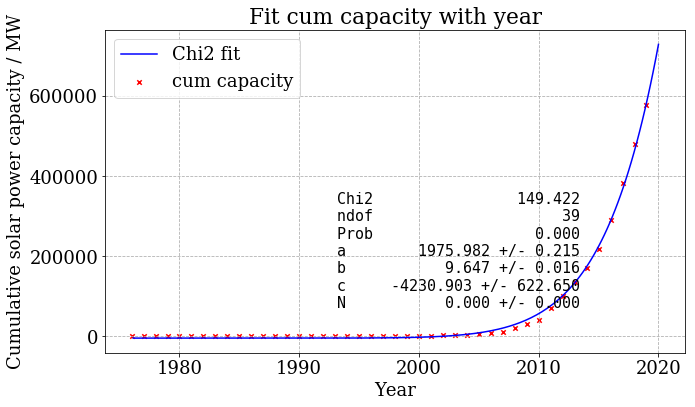

In [1041]:
chi2_capa_object = Chi2Regression(loc_pow_fit, year, capacity, np.ones(len(year))*3500)
capa_minuit = Minuit(chi2_capa_object, pedantic=False, a=1970, b=9,c=-24000, N=0)
capa_minuit.migrad()
chi2_capa_minuit = capa_minuit.fval
N_capa_dof = len(year)-5
Prob_chi2_capa = stats.chi2.sf(chi2_capa_minuit, N_capa_dof)  

fig_yc, ax_yc = plt.subplots(figsize=(10,6))
ax_yc.scatter(year, capacity, color='r',s=20, marker='x', label='cum capacity')
ax_yc.set_ylabel('Cumulative solar power capacity / MW')
ax_yc.set_xlabel('Year')
ax_yc.grid(linestyle='--')
x_capa = np.linspace(1975, 2020, 200)
ax_yc.plot(x_capa, loc_pow_fit(x_capa,*capa_minuit.args), '-b', label='Chi2 fit')
d = {'Chi2':     chi2_capa_minuit,
     'ndof':      N_capa_dof,
     'Prob':     Prob_chi2_capa,
     'a':[capa_minuit.values['a'],capa_minuit.errors['a']],
     'b':[capa_minuit.values['b'],capa_minuit.errors['b']],
     'c':[capa_minuit.values['c'],capa_minuit.errors['c']],
     'N':[capa_minuit.values['N'],capa_minuit.errors['N']],
    }
ax_yc.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax_yc.set_title('Fit cum capacity with year')
add_text_to_ax(0.4, 0.5, text, ax_yc, fontsize=15)
fig_yc.tight_layout()

Fit with 7 order polynomial function, set year 1976 as 0 point (Only shown in code).

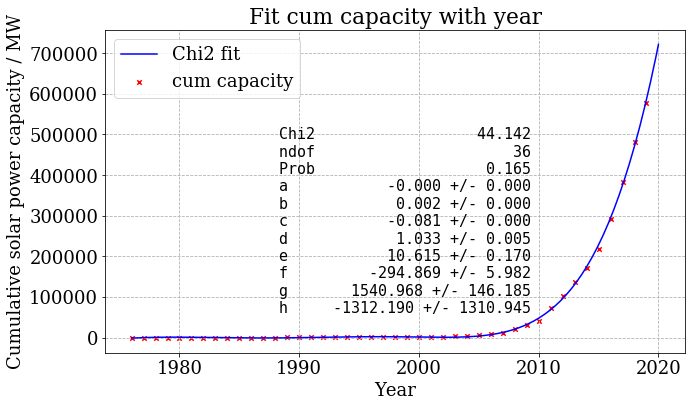

In [1410]:
def poly7_fit(x, a, b, c, d, e,f,g,h):
    return (a*x**7+b*x**6+c*x**5+d*x**4+e*x**3+f*x**2+g*x+h)

chi2_capa_object = Chi2Regression(poly7_fit, year-year[0], capacity, np.ones(len(year))*3500)
capa_minuit = Minuit(chi2_capa_object, pedantic=False, a=9e-5, b=-4e-3, c=-8e-2, d=8, e=-1.7e2, f=1.35e3, g=-3.8e3, h=1.8e3)
capa_minuit.migrad()
chi2_capa_minuit = capa_minuit.fval
N_capa_dof = len(year)-8
Prob_chi2_capa = stats.chi2.sf(chi2_capa_minuit, N_capa_dof)  

fig_yc, ax_yc = plt.subplots(figsize=(10,6))
ax_yc.scatter(year, capacity, color='r',s=20, marker='x', label='cum capacity')
ax_yc.set_ylabel('Cumulative solar power capacity / MW')
ax_yc.set_xlabel('Year')
ax_yc.grid(linestyle='--')
x_capa = np.linspace(0, 44, 200)
ax_yc.plot(x_capa+year[0], poly7_fit(x_capa,*capa_minuit.args), '-b', label='Chi2 fit')
d = {'Chi2':     chi2_capa_minuit,
     'ndof':      N_capa_dof,
     'Prob':     Prob_chi2_capa,
     'a':[capa_minuit.values['a'],capa_minuit.errors['a']],
     'b':[capa_minuit.values['b'],capa_minuit.errors['b']],
     'c':[capa_minuit.values['c'],capa_minuit.errors['c']],
     'd':[capa_minuit.values['d'],capa_minuit.errors['d']],
     'e':[capa_minuit.values['e'],capa_minuit.errors['e']],
     'f':[capa_minuit.values['f'],capa_minuit.errors['f']],
     'g':[capa_minuit.values['g'],capa_minuit.errors['g']],
     'h':[capa_minuit.values['h'],capa_minuit.errors['h']],
    }
ax_yc.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax_yc.set_title('Fit cum capacity with year')
add_text_to_ax(0.3, 0.7, text, ax_yc, fontsize=15)
poly_args = capa_minuit.args
fig_yc.tight_layout()

Decent fit, using the polynomial fit to estimate the price
Do a price predict in the next 10 years


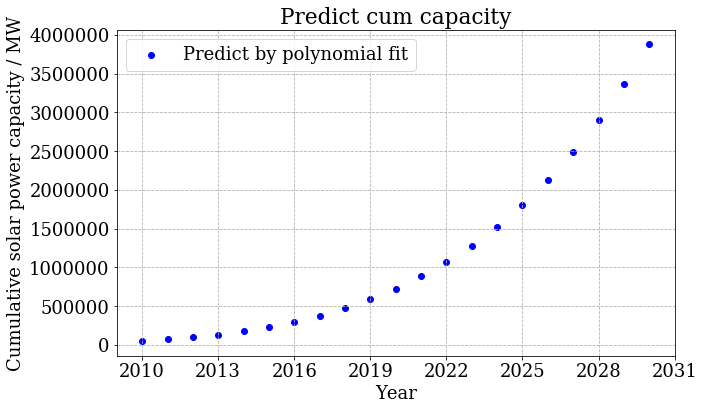

In [1411]:
print('Decent fit, using the polynomial fit to estimate the price')
print('Do a price predict in the next 10 years')
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Cumulative solar power capacity / MW')
ax.set_xlabel('Year')
ax.set_title('Predict cum capacity')
ax.grid(linestyle='--')
x = np.linspace(2010, 2030, 21)
y = poly7_fit(x-year[0], *poly_args)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.scatter(x, y, c='b', label=('Predict by polynomial fit'))
plt.legend()
plt.show()

In [1053]:
print('The cumulative capacity is over a million MW when at %2.0f.'%x[np.argwhere(y>1e6)][0])
print('When the price is %2.5f $/W.'%(pow_fit(1e6, *price_arg)))
print('Approximately equals to the real price around 2019.')

The cumulative capacity is over a million MW when at 2022.
When the price is 0.37533 $/W.
Approximately equals to the real price around 2019.


**5.2.1**

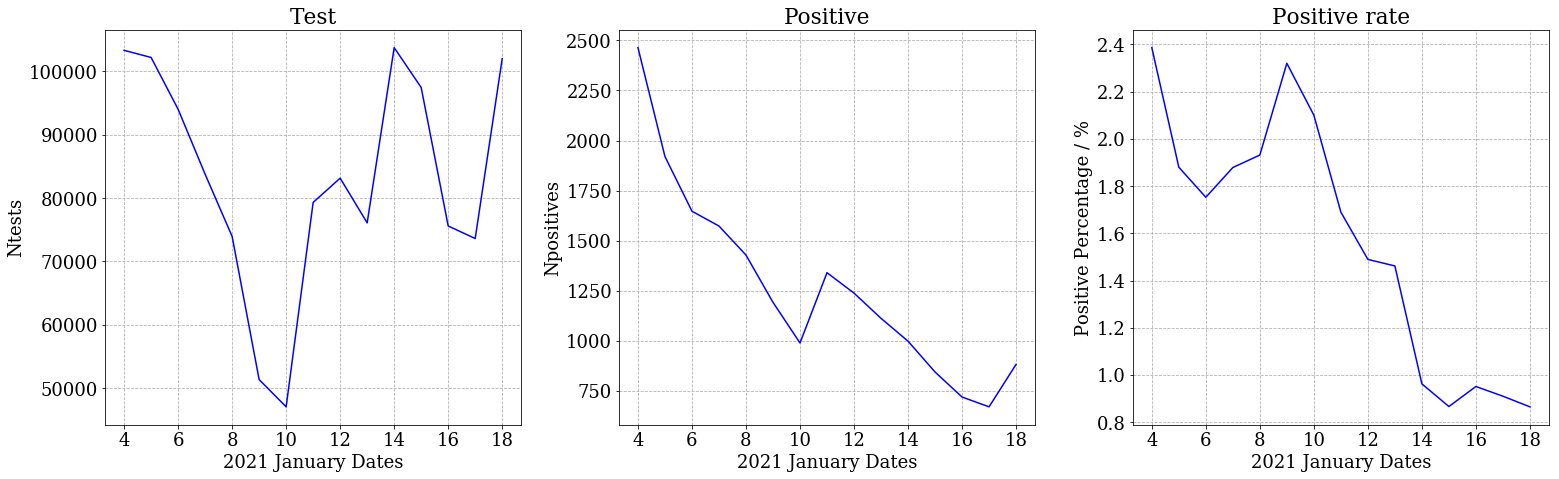

In [1076]:
date, Ntests, Npositives = np.loadtxt("data_Covid19tests.txt", skiprows=2, unpack=True)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,7))
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax3.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax1.plot(date, Ntests, c='b')
ax1.set_xlabel('2021 January Dates')
ax1.set_ylabel('Ntests')
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
ax3.grid(linestyle='--')
ax2.plot(date, Npositives, c='b')
ax2.set_xlabel('2021 January Dates')
ax2.set_ylabel('Npositives')
ax3.set_xlabel('2021 January Dates')
ax3.set_ylabel('Positive Percentage / %')
ax3.plot(date, 100 * Npositives/Ntests, c='b')
ax1.set_title('Test')
ax2.set_title('Positive')
ax3.set_title('Positive rate')
fig.tight_layout()

In [1065]:
Ntest_avg = (np.sum(Ntests)/len(date))
print('The average number of tests from 4th to 18th is approximately %2.0f. '%Ntest_avg)

The average number of tests from 4th to 18th is approximately 83090. 


**5.2.2**

Do the $\chi_2$ fit.

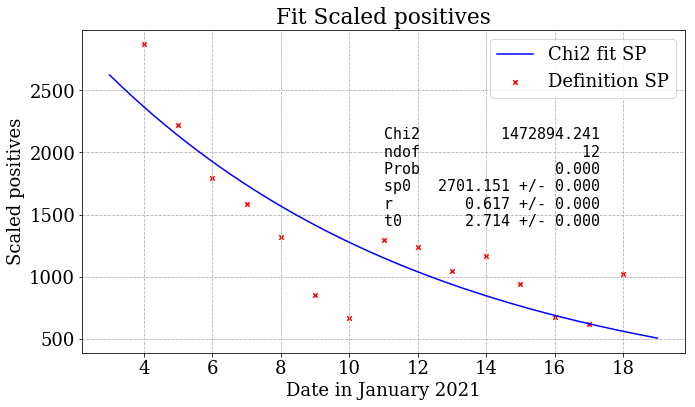

In [1401]:
def sp_fit(t, sp0, r, t0, tg=4.7):
    return sp0 * r ** ((t-t0)/4.7)

sp_def = Npositives*(Ntests / Ntest_avg) ** 0.7
chi2_sp_object = Chi2Regression(sp_fit, date, sp_def)
sp_minuit = Minuit(chi2_sp_object, pedantic=False, sp0=2500, r=0.5, t0=1)
sp_minuit.migrad()
chi2_sp_minuit = sp_minuit.fval
N_sp_dof = len(date)-3
Prob_chi2_sp = stats.chi2.sf(chi2_sp_minuit, N_sp_dof)  

fig_sp, ax_sp = plt.subplots(figsize=(10,6))
ax_sp.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax_sp.scatter(date, sp_def, color='r',s=20, marker='x', label='Definition SP')
ax_sp.set_ylabel('Scaled positives')
ax_sp.set_xlabel('Date in January 2021')
ax_sp.grid(linestyle='--')
x_sp = np.linspace(3, 19, 200)
ax_sp.plot(x_sp, sp_fit(x_sp,*sp_minuit.args), '-b', label='Chi2 fit SP')
d = {'Chi2':     chi2_sp_minuit,
     'ndof':      N_sp_dof,
     'Prob':     Prob_chi2_sp,
     'sp0':[sp_minuit.values['sp0'],sp_minuit.errors['sp0']],
     'r':[sp_minuit.values['r'],sp_minuit.errors['r']],
     't0':[sp_minuit.values['t0'],sp_minuit.errors['t0']],
    }
ax_sp.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax_sp.set_title('Fit Scaled positives')
add_text_to_ax(0.5, 0.7, text, ax_sp, fontsize=15)
poly_args = sp_minuit.args
fig_sp.tight_layout()

**5.2.3**

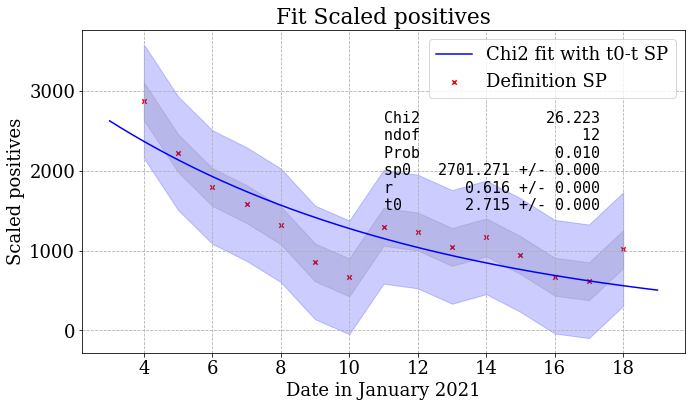

In [1406]:
sp_def = Npositives*(Ntests / Ntest_avg) ** 0.7
chi2_sp_object = Chi2Regression(sp_fit, date, sp_def, np.ones(len(date))*237)
sp_minuit = Minuit(chi2_sp_object, pedantic=False, sp0=2500, r=0.5, t0=1)
sp_minuit.migrad()
chi2_sp_minuit = sp_minuit.fval
N_sp_dof = len(date)-3
Prob_chi2_sp = stats.chi2.sf(chi2_sp_minuit, N_sp_dof)  

fig_sp, ax_sp = plt.subplots(figsize=(10,6))
ax_sp.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax_sp.scatter(date, sp_def, color='r',s=20, marker='x', label='Definition SP')
ax_sp.set_ylabel('Scaled positives')
ax_sp.set_xlabel('Date in January 2021')
ax_sp.grid(linestyle='--')
x_sp = np.linspace(3, 19, 200)
ax_sp.plot(x_sp, sp_fit(x_sp,*sp_minuit.args), '-b', label='Chi2 fit with t0-t SP')
d = {'Chi2':     chi2_sp_minuit,
     'ndof':      N_sp_dof,
     'Prob':     Prob_chi2_sp,
     'sp0':[sp_minuit.values['sp0'],sp_minuit.errors['sp0']],
     'r':[sp_minuit.values['r'],sp_minuit.errors['r']],
     't0':[sp_minuit.values['t0'],sp_minuit.errors['t0']],
    }
ax_sp.fill_between(date, sp_def-237, sp_def+237,
                 color='gray', alpha=0.2)

ax_sp.fill_between(date, sp_def-237*3, sp_def+237*3,
                 color='blue', alpha=0.2)
ax_sp.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
ax_sp.set_title('Fit Scaled positives')
add_text_to_ax(0.5, 0.75, text, ax_sp, fontsize=15)
poly_args = sp_minuit.args
fig_sp.tight_layout()

By test, when the absolute systematic uncertainty touch 237, the P-value will be reasonable, which is by now 0.01.

**5.2.4**

Analytically, seperate R out we get:$$R = ({\frac{\text{SP}(t)}{\text{SP}_0}})^{(t_0-t)/t_g}$$ Using this, and assume that $\text{SP}_0, t_0, \text{SP}(t), t$ are super accurate (without uncertainty), we can in\text{SP}ect the contribution when $t_G$ has $\pm 1.0$ days.
$$\sigma_R^2 = (\frac{\partial R}{\partial t_G})^2\cdot \sigma_{t_G}^2$$
$$\sigma_R^2 = (\frac{\text{SP}(t)}{\text{SP}_0})^{(t_0-t)/t_g} \cdot \ln [\frac{\text{SP}(t)}{\text{SP}_0}] \cdot \frac{(t-t_0)}{t_g^2})^2 \times 1$$
Now plug in fit Sp0, t0, tg, and t, Sp.

In [1407]:
def var_R(sp, t, sp0, t0, tg):
    return (np.power(sp/sp0, (t-t0)/tg) * np.log(sp/sp0) * (t0-t) / tg**2) ** 2
vr = var_R(sp_def, date, 2701.271, 0.616, 2.715)
for i in range(len(vr)):
    print('On Day %2.0f'%date[i], ', The uncertainty on R is %2.5f'%np.sqrt(vr[i]))

On Day  4 , The uncertainty on R is 0.02982
On Day  5 , The uncertainty on R is 0.08520
On Day  6 , The uncertainty on R is 0.13273
On Day  7 , The uncertainty on R is 0.13168
On Day  8 , The uncertainty on R is 0.10190
On Day  9 , The uncertainty on R is 0.03716
On Day 10 , The uncertainty on R is 0.01402
On Day 11 , The uncertainty on R is 0.06247
On Day 12 , The uncertainty on R is 0.04577
On Day 13 , The uncertainty on R is 0.02100
On Day 14 , The uncertainty on R is 0.02420
On Day 15 , The uncertainty on R is 0.00780
On Day 16 , The uncertainty on R is 0.00110
On Day 17 , The uncertainty on R is 0.00044
On Day 18 , The uncertainty on R is 0.00445


The largest uncertainty contribution from tg is around 0.133.

In [1572]:
import nbconvert
!jupyter-nbconvert --to PDFviaHTML -TemplateExporter.exclude_input=True --no-prompt FinalExam2020_KianGao.ipynb

[NbConvertApp] Converting notebook FinalExam2020_KianGao.ipynb to PDFviaHTML
[NbConvertApp] Writing 3905000 bytes to FinalExam2020_KianGao.pdf
